# Boston Regression Problem using NN (With Keras & Tensorflow)
## Overview of the Boston Data Set

Some informations about the data :  
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978."  
### Attributes : 
There are 14 attributes in each case of the dataset. They are:  
   > *Independent Variables* :  
- **crim** : per capita crime rate by town.  
- **zn** : proportion of residential land zoned for lots over 25,000 sq.ft.  
- **indus** : proportion of non-retail business acres per town.  
- **chas** : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).  
- **nox** : nitrogen oxides concentration (parts per 10 million).  
- **rm** : average number of rooms per dwelling.  
- **age** : proportion of owner-occupied units built prior to 1940.  
- **dis** : weighted mean of distances to five Boston employment centres.  
- **rad** : index of accessibility to radial highways.  
- **tax** : full-value property-tax rate per 10,000 Dollars.
- **ptratio** : pupil-teacher ratio by town.
- **black** : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.  
- **lstat** : lower status of the population (percent).    

 > *Target Variable* :  
- **medv** : median value of owner-occupied homes in 1000s Dollars.  

<img src="bostonPic.jpg">


In [168]:
#Importing libraries
#Basics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Keras
from keras import models
from keras import layers
import keras.utils as kut  #For categorization

#SKLearn
from sklearn import ensemble, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Tensorflow
import tensorflow as tf


## Loading & Preprocessing Data for modeling

In [169]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [170]:
print("X shape = "+str(X.shape))
print("Y shape = "+str(y.shape))


X shape = (506, 13)
Y shape = (506,)


Having about 500 Observations (which is not a large number), the split is usually done in a 80/20 proportion.

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1995, test_size = 0.2)

print("Train shape"+str(X_train.shape))
print("Test shape"+str(X_test.shape))

y_train = y_train.reshape((y_train.shape[0],))

Train shape(404, 13)
Test shape(102, 13)


We scale-up data to make the training process easier and more efficient.

In [172]:
#Preprocessing : scaling up
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Random Forest Model as a Base-line (With SKLearn)
  To decide wether a DNN is worth using for a modeling task, it's often preferable to start with a base-line model (a kind of benchmark), to evaluate its accuracy and see if it can be further improved. Usually, random Forests are a superb choice for setting that base-line.  
In the next lines of code, we train and evaluate a random forest model with a given set of hyperparameters (max_features (m), n_estimators (n_trees), max_depth..)

In [173]:
# Model definition
rfModel = ensemble.RandomForestRegressor(n_estimators=5000, max_features=8, max_depth=2, random_state=1996)

# Model Training
rfModel.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=1996,
           verbose=0, warm_start=False)

In [174]:
# Predictions & Accuracy
y_pred_rf = rfModel.predict(X_train)
y_test_pred_rf = rfModel.predict(X_test)
print("Train RMSE for RF Model = "+str(np.sqrt(mean_squared_error(y_train, y_pred_rf))))
print("Test RMSE for RF Model = "+str(np.sqrt(mean_squared_error(y_test, y_test_pred_rf))))



Train RMSE for RF Model = 4.2436195242046715
Test RMSE for RF Model = 4.912176723129005


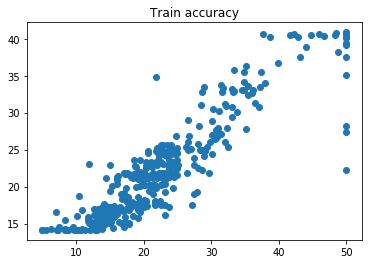

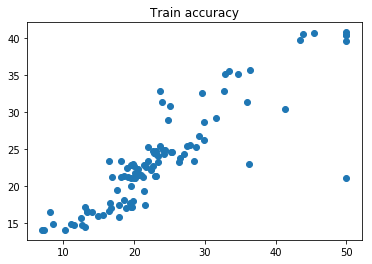

In [175]:
#Plotting the true/predicted values scatter plot
plt.title("Train accuracy")
plt.scatter(y_train,y_pred_rf)
plt.show()

plt.title("Train accuracy")
plt.scatter(y_test,y_test_pred_rf)
plt.show()

The results are quiet acceptable and there is no overfitting.  
**Note** : *The observation points being stuck at 50 for medv variable (medium value of owner-occupied homes in 1000 Dollars) are a sign of a censored data. We will ignore it in this notebook.*

## Using a Deep Neural Network Model (With Keras)

- The core architecture of the NN to be used :  
**Input ->(Linear[64] > Relu) -> (Linear[64] > Relu) -> (Linear[64] > Relu) -> Output**  
- Optimize : Adam  
- Loss : MSE  
- Processing type : Mini-Batch (size = 101)
- Epoches : 2000

In [209]:
#Model Building 
myNetwork = models.Sequential()
myNetwork.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))    #First layer
myNetwork.add(layers.Dense(64, activation='relu', input_shape=(64,)))    #Second layer
myNetwork.add(layers.Dense(1, activation='relu', input_shape=(64,)))  #Third layer (output)
myNetwork.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])

In [210]:
myNetwork.fit(X_train, y_train, epochs=2000, batch_size=101, verbose=False)

In [211]:
# Predictions & Accuracy
y_pred_dnn_keras = myNetwork.predict(X_train)          # We can also use myNetwork.evaluate(X_test, y_test)
y_test_pred_dnn_keras = myNetwork.predict(X_test)
print("Train RMSE for DNN Model (Keras) = "+str(np.sqrt(mean_squared_error(y_train, y_pred_dnn_keras))))
print("Test RMSE for DNN Model (Keras) = "+str(np.sqrt(mean_squared_error(y_test, y_test_pred_dnn_keras))))



Train RMSE for DNN Model (Keras) = 0.43912498998512156
Test RMSE for DNN Model (Keras) = 3.747942097206936


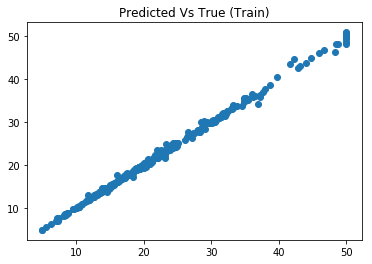

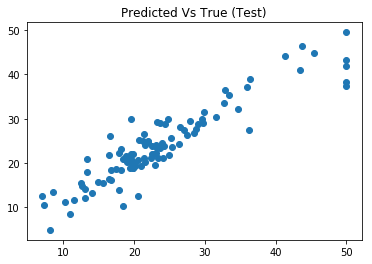

In [212]:
#Plotting the true/predicted values scatter plot
plt.title("Predicted Vs True (Train)")
plt.scatter(y_train,y_pred_dnn_keras)
plt.show()

plt.title("Predicted Vs True (Test)")
plt.scatter(y_test,y_test_pred_dnn_keras)
plt.show()

Using Keras, a basic Neural Network with 3 hidden layers and default hyperparameters shows a mediocre accuracy and a clear overfitting. Compared to our base-line, this model didn't pass the test. In the next demo, we try to adress these problems with some improvment technics using a lower API : Tensorflow.

## Using a Deep Neural Network Model (With Tensorflow)
- The core architecture of the NN to be used (Same as before) :  
**Input ->(Linear[64] > Relu6) -> (Linear[64] > Relu6) -> (Linear[64] > Relu) -> Output**  
- Optimize : Gradient Descent  
- Learning rate : 0.001
- Loss : MSE  
- Processing type : Mini-Batch (size = 101)
- Epoches : 10000

In [213]:
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

In [216]:

#HyperParameters : 
myLayers = np.array([X_train.shape[1], 64, 64,1])
alpha = 0.001

#Graph building
myGraph = tf.Graph()
with myGraph.as_default():
    with tf.name_scope("Placeholders"):
        x = tf.placeholder(dtype=tf.float32, shape=(None,X_train.shape[1]), name="input")
        y = tf.placeholder(dtype=tf.float32, shape=(None,1), name="output")
        
    with tf.name_scope("h_layer1"):
        W1 = tf.Variable(tf.truncated_normal((myLayers[0], myLayers[1])), dtype=tf.float32)
        b1 = tf.Variable(tf.truncated_normal((myLayers[1],)))
        Z1 = tf.matmul(tf.squeeze(x), W1)+b1
        A1 = tf.nn.relu6(Z1)
    with tf.name_scope("h_layer2"):
        W2 = tf.Variable(tf.truncated_normal((myLayers[1], myLayers[2])), dtype=tf.float32)
        b2 = tf.Variable(tf.truncated_normal((myLayers[2],)))
        Z2 = tf.matmul(A1, W2)+b2
        A2 = tf.nn.relu6(Z2)
    
    with tf.name_scope("out_layer"):
        W3 = tf.Variable(tf.truncated_normal((myLayers[2], myLayers[3])), dtype=tf.float32)
        b3 = tf.Variable(tf.truncated_normal((myLayers[3],)))
        Z3 = tf.matmul(A2, W3)+b3
        outputIt = tf.nn.relu(Z3)

        
    with tf.name_scope("cost"):
        c = tf.reduce_mean((y-outputIt)**2)
    
    with tf.name_scope("optimizer"):
        trainIt = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(c)
    
    initializer = tf.global_variables_initializer()
    

Cost at epoch 0 = 512.702148
Cost at epoch 1000 = 0.257325
Cost at epoch 2000 = 0.120817
Cost at epoch 3000 = 0.092892
Cost at epoch 4000 = 0.082184
Cost at epoch 5000 = 0.077260
Cost at epoch 6000 = 0.074120
Cost at epoch 7000 = 0.072057
Cost at epoch 8000 = 0.070567
Cost at epoch 9000 = 0.069477
Train RMSE for DNN Model (TF) = 0.261209434200303
Test RMSE for DNN Model (TF) = 6.5678813404385075


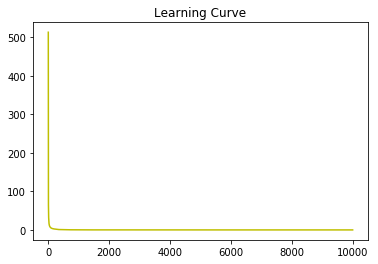

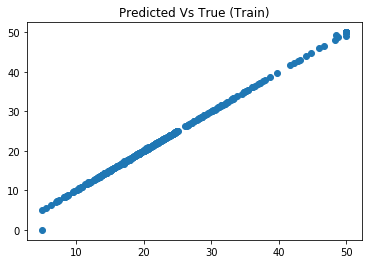

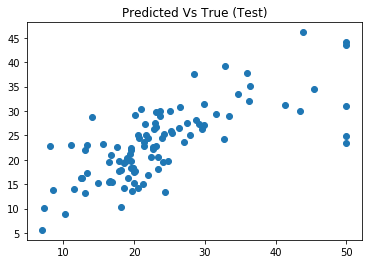

In [217]:
#Run the session : 
#Train Parameters :
n_epoches = 10000
batch_size = 101
n_batches = X_train.shape[0]//batch_size

mySession = tf.Session(graph=myGraph)
with tf.Session(graph=myGraph) as mySession : 
    mySession.run(initializer)
    myCosts = list()
    
    for i in range(n_epoches):
        myC = list()
        for k in range(n_batches):
            feedDict = {x:X_train[k*batch_size:(k+1)*batch_size,], y:y_train[k*batch_size:(k+1)*batch_size,]}
            _, cost  = mySession.run([trainIt,c], feed_dict = feedDict)
            myC.append(cost)
        myC = np.mean(myC)
        myCosts.append(myC)
        if (i%1000==0):
            print("Cost at epoch %d = %f"%(i,myC))
            
    #Optimal Learned Parameters    
    w1_final, b1_final, W2_final, b2_final, W3_final, b3_final = mySession.run([W1, b1,W2,b2, W3, b3])
    
    #Predict train data (fitted data) + accuracy
    y_pred_dnn_tf = mySession.run(outputIt, feed_dict = {x:X_train})
    train_accuracy_tf = np.sqrt(mean_squared_error(y_pred_dnn_tf,y_train))
    
    #Predict test data + accuracy
    y_test_pred_dnn_tf = mySession.run(outputIt, feed_dict = {x:X_test})
    test_accuracy_tf = np.sqrt(mean_squared_error(y_test_pred_dnn_tf,y_test))
    
    print("Train RMSE for DNN Model (TF) = "+str(train_accuracy_tf))
    print("Test RMSE for DNN Model (TF) = "+str(test_accuracy_tf))


    #Plotting the Learning Curve
    plt.title("Learning Curve")
    plt.plot(myCosts, "y")
    plt.show()
    
    #Plotting predicted = f(true) [Train]
    plt.title("Predicted Vs True (Train)")
    plt.scatter(y_train,y_pred_dnn_tf)
    plt.show()


    #Plotting predicted = f(true) [Test]
    plt.title("Predicted Vs True (Test)")
    plt.scatter(y_test,y_test_pred_dnn_tf)
    plt.show()



We still have an **overfitting**, and the RMSE is still greated than the base-line model RMSE. We will proceed with some regularization methods to overcome this problem.

### Regularizing the DNN (Tensorflow)
One of the most common regularization methods used in NN is the "Drop-Out Regularization", and that's what we will try in this demo. Besides, we will use an more efficient version of Gradient Descent called "Adaptive Momentum" which is a kind of mixture between RMSProp and Momentum Gradient Descent. It introduces 2 hyperparameters beta1 & beta2, but we will use the default values (0.9 and 0.99 respectively). With Adam optimization, we can use a larger value for the learning rate alpha since this algorithm "adapts" while learning.  
- The core architecture of the NN to be used (Same as before) :  
**Input ->(Linear[64] > Relu6 > DropOut ) -> (Linear[64] > Relu6 > DropOut) -> (Linear[64] > Relu) -> Output**  
- Optimize : Adam  
- Learning rate : 0.002
- Loss : MSE  
- Processing type : Mini-Batch (size = 101)
- Epoches : 10000
- Keep Prob : 0.6

In [230]:
#HyperParameters : 
myLayers = np.array([X_train.shape[1], 64, 64,1])
alpha = 0.01
keepP = np.array(0.6)    #Keep Probability, a hyperparameter introduced by Drop_Out Reg.  
                         #A Unit has P(X<keepP)=F(keepP) to stay active. X follows a Uniform Distribution within [0-1]
#Graph building
myGraph = tf.Graph()
with myGraph.as_default():
    with tf.name_scope("Placeholders"):
        x = tf.placeholder(dtype=tf.float32, shape=(None,X_train.shape[1]), name="input")
        y = tf.placeholder(dtype=tf.float32, shape=(None,1), name="output")
        keepProb = tf.placeholder(dtype=tf.float32, name="Keep_prob")
        
    with tf.name_scope("h_layer1"):
        W1 = tf.Variable(tf.truncated_normal((myLayers[0], myLayers[1])), dtype=tf.float32)
        b1 = tf.Variable(tf.truncated_normal((myLayers[1],)))
        Z1 = tf.matmul(tf.squeeze(x), W1)+b1
        A1 = tf.nn.relu6(Z1)
        A1 = tf.nn.dropout(A1, keep_prob=keepProb)
    with tf.name_scope("h_layer2"):
        W2 = tf.Variable(tf.truncated_normal((myLayers[1], myLayers[2])), dtype=tf.float32)
        b2 = tf.Variable(tf.truncated_normal((myLayers[2],)))
        Z2 = tf.matmul(A1, W2)+b2
        A2 = tf.nn.relu6(Z2)
        A2 = tf.nn.dropout(A2, keep_prob=keepProb)
    with tf.name_scope("out_layer"):
        W3 = tf.Variable(tf.truncated_normal((myLayers[2], myLayers[3])), dtype=tf.float32)
        b3 = tf.Variable(tf.truncated_normal((myLayers[3],)))
        Z3 = tf.matmul(A2, W3)+b3
        outputIt = tf.nn.relu(Z3)
        
    with tf.name_scope("cost"):
        c = tf.reduce_mean((y-outputIt)**2)
    
    with tf.name_scope("optimizer"):
        trainIt = tf.train.AdamOptimizer(learning_rate=alpha).minimize(c)
    
    initializer = tf.global_variables_initializer()
    

Cost at epoch 0 (average batches) = 459.253845
Cost at epoch 1000 (average batches) = 10.251832
Cost at epoch 2000 (average batches) = 6.341271
Cost at epoch 3000 (average batches) = 4.906337
Cost at epoch 4000 (average batches) = 4.030223
Cost at epoch 5000 (average batches) = 4.880855
Cost at epoch 6000 (average batches) = 6.085420
Cost at epoch 7000 (average batches) = 5.286377
Cost at epoch 8000 (average batches) = 4.564999
Cost at epoch 9000 (average batches) = 5.513671
Train RMSE for DNN Model (TF) = 1.1176556337359704
Test RMSE for DNN Model (TF) = 3.40790227680122


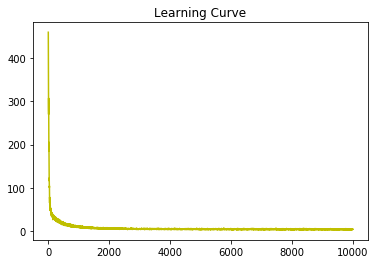

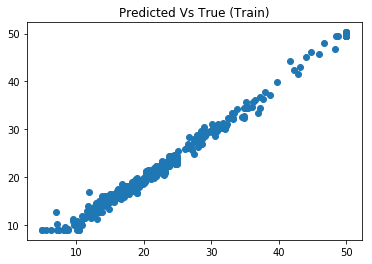

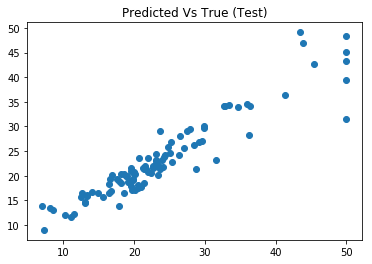

In [231]:
#Run the session : 
#Train Parameters :
n_epoches = 10000
batch_size = 101
n_batches = X_train.shape[0]//batch_size

mySession = tf.Session(graph=myGraph)
with tf.Session(graph=myGraph) as mySession : 
    mySession.run(initializer)
    myCosts = list()
    
    for i in range(n_epoches):
        myC = list()
        for k in range(n_batches):
            feedDict = {x:X_train[k*batch_size:(k+1)*batch_size,], y:y_train[k*batch_size:(k+1)*batch_size,], keepProb : keepP}
            _, cost  = mySession.run([trainIt,c], feed_dict = feedDict)
            myC.append(cost)
        myC = np.mean(myC)
        myCosts.append(myC)
        if (i%1000==0):
            print("Cost at epoch %d (average batches) = %f"%(i,myC))
            
    #Optimal Learned Parameters    
    w1_final, b1_final, W2_final, b2_final, W3_final, b3_final = mySession.run([W1, b1,W2,b2, W3, b3])
    
    #Predict train data (fitted data) + accuracy
    y_pred = mySession.run(outputIt, feed_dict = {x:X_train,  keepProb : 1})
    train_accuracy_tf = np.sqrt(mean_squared_error(y_pred,y_train))
    
    #Predict test data + accuracy
    y_test_pred = mySession.run(outputIt, feed_dict = {x:X_test,  keepProb : 1})
    test_accuracy_tf = np.sqrt(mean_squared_error(y_test_pred,y_test))
    
    print("Train RMSE for DNN Model (TF) = "+str(train_accuracy_tf))
    print("Test RMSE for DNN Model (TF) = "+str(test_accuracy_tf))


    #Plotting the Learning Curve
    plt.title("Learning Curve")
    plt.plot(myCosts, "y")
    plt.show()
    
    #Plotting predicted = f(true) [Train]
    plt.title("Predicted Vs True (Train)")
    plt.scatter(y_train,y_pred)
    plt.show()


    #Plotting predicted = f(true) [Test]
    plt.title("Predicted Vs True (Test)")
    plt.scatter(y_test,y_test_pred)
    plt.show()




After these basic regularizations, we obtain a model with a reduced overfitting effect and a higher accuracy.